<a href="https://colab.research.google.com/github/ndow33/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [93]:
df = df.drop('diagnosis', axis=1)
#get rid of NaN's
df = df.drop('Unnamed: 32', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


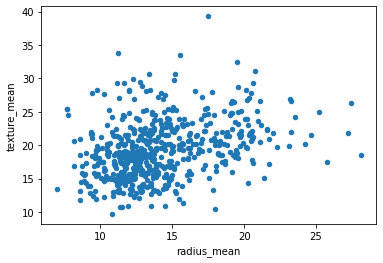

In [94]:
#Data exploration: find features that tend to cluster
features = ['radius_mean', 'texture_mean']
df[features].plot(kind="scatter", x = features[0], y = features[1]);

In [95]:
#run an elbow test to determine how many centroids we should use
#make the two features into a new dataframe that can be fed into the fit() function
df2 = df[features]

df2.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [0]:
sum_of_squared_distances = [] #make an empty list
K = range(1,15) #the optimal number of centroids in this case is probably between 1 and 15
for k in K:
  km = KMeans(n_clusters=k) #set the number of clusters to k
  km = km.fit(df2)
  sum_of_squared_distances.append(km.inertia_)

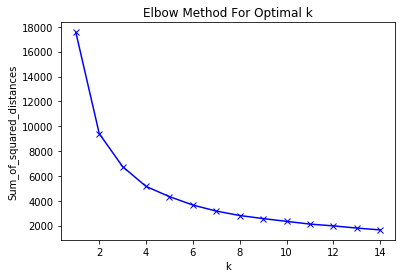

based on this, the major inflection point is at x = 2, so we will use 2 clusters


In [97]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print('based on this, the major inflection point is at x = 2, so we will use 2 clusters')

In [0]:
# Perform K-Means Clustering on df2

In [0]:
#initialize an instance of the KMeans class from sklearn
k = 2
model = KMeans(n_clusters = k, max_iter=1)

In [100]:
#Fit the instantiated model to df2
model.fit(df2.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [101]:
#assign clusters back to our dataframe
df2['cluster'] = model.labels_
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,radius_mean,texture_mean,cluster
0,17.99,10.38,1
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,1
4,20.29,14.34,1


In [0]:
#get our centroids
centroids = model.cluster_centers_

In [103]:
#turn them into a dataframe
cent_df2 = pd.DataFrame(centroids)
cent_df2.head() 

,0,1
0,16.315011,22.374659
1,12.022555,16.321655


In [0]:
#set up some colors for plotting
base_colors = ['r', 'b']
colors = [base_colors[centroid] for centroid in model.labels_]

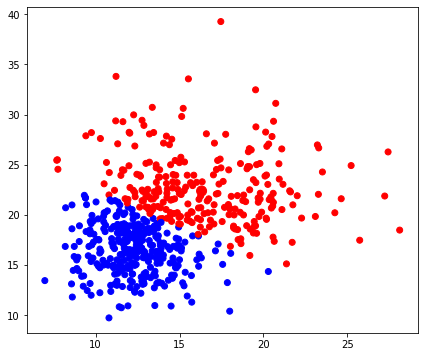

In [105]:
#plot the scatter of our points with calculated centroids

fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cent_df2[0], cent_df2[1], c=base_colors, s=100);

In [106]:
#silhouette score
from sklearn import metrics
metrics.silhouette_score(df2, model.labels_, metric='euclidean')

0.42281942645651577

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####

#You need to standardize your data before PCA.

In [0]:
#make a copy of our dataframe
df_processed = df.copy()

In [0]:
#instantiate the SKLearn class for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
#standardize the dataset (default is normalization)
df_processed = scaler.fit_transform(df_processed)

In [0]:
#import and instantiate the PCA class
from sklearn.decomposition import PCA
my_pca = PCA(n_components=2)

In [0]:
#apply PCA to the data
my_pca_features = my_pca.fit_transform(df_processed)

In [115]:
#how much variation did each principal component explain?
my_pca.explained_variance_ratio_

array([0.42864701, 0.18376792])

In [116]:
#how much total variance did we explain?
sum(my_pca.explained_variance_ratio_)

0.6124149284660223

In [118]:
#Turn it into a dataframe
df_my_pca = pd.DataFrame(my_pca_features, columns=['comp_1', 'comp_2'])
df_my_pca.head()

,comp_1,comp_2
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689


#First try clustering just on comp_1 and comp_2 so that you can make a scatterplot of your clustering.

In [0]:
#initialize an instance of the KMeans class from sklearn
k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [120]:
#fit the instantiated model to our sliced dataframe
model.fit(df_my_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#assign predicted clusters back to our dataframe
df_my_pca['cluster'] = model.labels_

In [0]:
#get our centroids
centroids = model.cluster_centers_

In [124]:
#turn them into a dataframe
cc = pd.DataFrame(centroids)
cc.head()

,0,1
0,-2.565064,-0.364918
1,1.508499,3.172454
2,4.536355,-1.609220


In [0]:
#setup some colors for plotting
base_colors = ['r','b', 'g']
colors = [base_colors[centroid] for centroid in model.labels_]

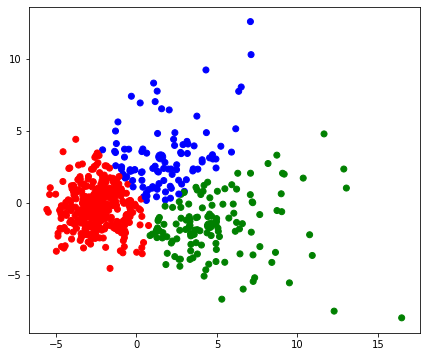

In [129]:
#plot the scatter of our points with calculated centroids
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df_my_pca['comp_1'], df_my_pca['comp_2'], c = colors)
ax.scatter(cc[0], cc[1], c= base_colors, s=100);

In [131]:
#what's our silhouette score?
metrics.silhouette_score(df, model.labels_, metric='euclidean')

-0.03220144307468316

In [134]:
#what is the predicted centroid for the first ten data points?
model.labels_[:10]

array([2, 2, 2, 1, 2, 1, 2, 1, 1, 1], dtype=int32)

#Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset

In [0]:
#import and instantiate the PCA class
from sklearn.decomposition import PCA
my_pca_2 = PCA(n_components=15)

In [0]:
# Apply PCA to the data
pca_features = my_pca_2.fit_transform(df_processed)

In [141]:
# define the number of components
num_components=len(my_pca_2.explained_variance_ratio_)
num_components

15

In [142]:
# create a numpy array as long as the number of components
ind = np.arange(num_components) 
ind

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [143]:
# create an array of 10 values
vals = my_pca_2.explained_variance_ratio_
vals

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 , 0.02166945, 0.01486427, 0.01300429,
       0.01126306, 0.00948034, 0.00842409, 0.00778485, 0.00506367])

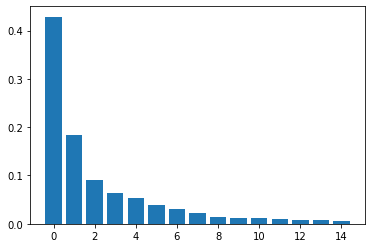

In [144]:
# Plot the variance explained by each component.
ind = np.arange(num_components)
num_components=len(my_pca_2.explained_variance_ratio_)
plt.bar(ind, vals);

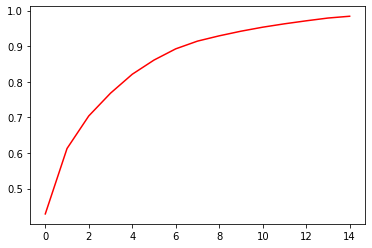

In [145]:
# Plot the cumulative variance explained by all the components.
ind = np.arange(num_components)
vals = my_pca_2.explained_variance_ratio_
cumvals = np.cumsum(vals)
plt.plot(ind, cumvals, c='r');

In [0]:
# Define scree plot function
def scree_plot(pca):

    num_components=len(my_pca_2.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    plt.axhline(y=0.9, color='g')
    plt.axvline(x = 7, color='g')
    plt.axvline(x = 6, color='g')




    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

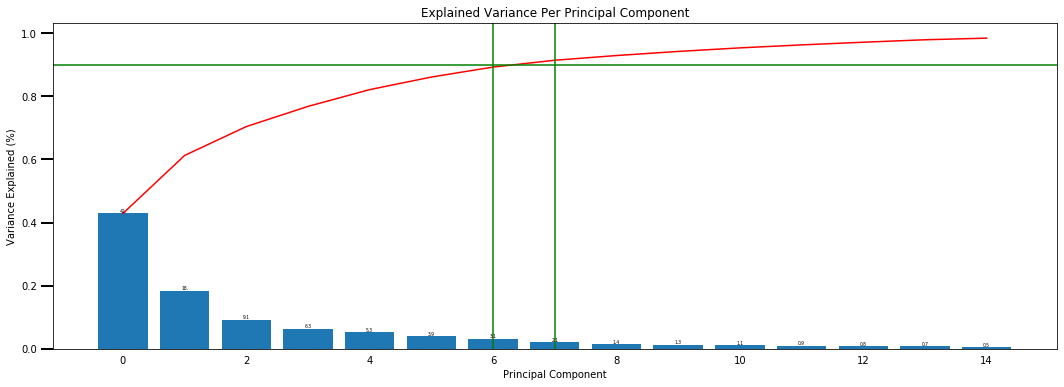

In [156]:
# Apply the plot function to our principle component
#the green lines are to help me see where the explained variance is greater than 90%
scree_plot(my_pca_2)

In [0]:
#instantiate the PCA class and use 8 principal components to be safe
from sklearn.decomposition import PCA
my_pca = PCA(n_components=8)

In [0]:
#apply PCA to the data
my_pca_features = my_pca.fit_transform(df_processed)

In [163]:
#how much variation did each principal component explain?
my_pca.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 , 0.02166945])

In [164]:
#how much explained variance total?
sum(my_pca.explained_variance_ratio_)

0.914036426692289

In [165]:
#turn it into a dataframe
df_my_pca = pd.DataFrame(my_pca_features, columns=['comp_1', 'comp_2', 'comp_3', 
                                                   'comp_4', 'comp_5', 'comp_6', 
                                                   'comp_7', 'comp_8'])
df_my_pca.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372281,0.371843,2.180534
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126615,-0.288268,0.044933
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463189,-0.715202
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561669,1.950175,1.287991
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233299,-0.205438,-0.959334


In [0]:
#initialize an instance of the KMeans class from sklearn
k = 8
model = KMeans(n_clusters=k, max_iter=1)

In [167]:
#fit the instantiated model to our sliced dataframe
model.fit(df_my_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [172]:
#assign predicted clusters back to our dataframe
df_my_pca['cluster'] = model.labels_
df_my_pca.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,cluster
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372281,0.371843,2.180534,3
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126615,-0.288268,0.044933,4
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463189,-0.715202,4
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561669,1.950175,1.287991,3
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233299,-0.205438,-0.959334,4


In [0]:
#get our centroids
centroids = model.cluster_centers_

In [170]:
#turn them into a dataframe
cc = pd.DataFrame(centroids)
cc.head()

,0,1,2,3,4,5,6,7
0,-3.147187,1.603486,0.934320,-0.113479,-1.169748,-0.057348,0.329984,0.278850
1,2.779559,1.509639,-1.556774,-0.067960,-0.093445,0.384188,-0.117945,-0.000212
2,-2.068064,-1.660219,0.045076,-0.809469,0.633510,-0.158981,0.025349,0.089579
3,7.593204,3.914283,-0.361515,-0.135690,-0.596716,-1.918696,0.469417,-0.027118
4,4.565735,-2.417374,0.391777,-0.059771,-0.120784,0.011589,-0.117775,-0.171309


In [0]:
#setup some colors for plotting
base_colors = ['r','b', 'g', 'k', 'c', 'm', 'y', 'tan']
colors = [base_colors[centroid] for centroid in model.labels_]

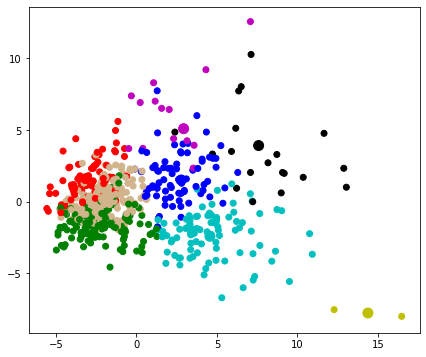

In [177]:
#plot the scatter of our points with calculated centroids
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df_my_pca['comp_1'], df_my_pca['comp_2'], c = colors)
ax.scatter(cc[0], cc[1], c= base_colors, s=100);

In [178]:
#what's your silhouette score?
metrics.silhouette_score(df, model.labels_, metric='euclidean')

-0.4814639533684244

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project